In [112]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


df = pd.read_csv('Data/parks_dataset.csv')

df.head()

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [113]:
df_neighborhood = df.groupby('neighborhood').agg(
    total_parks=('name', 'count'))

df_neighborhood.reset_index(inplace=True)
df_neighborhood.sort_values('total_parks', ascending=False, inplace=True)
df_neighborhood

,neighborhood,total_parks
22,East Liberty,12
13,Central Business District,10
5,Beechview,8
50,Point Breeze,7
57,South Side Slopes,7
...,...,...
34,Homewood West,1
47,Oakwood,1
41,Middle Hill,1
45,North Oakland,1


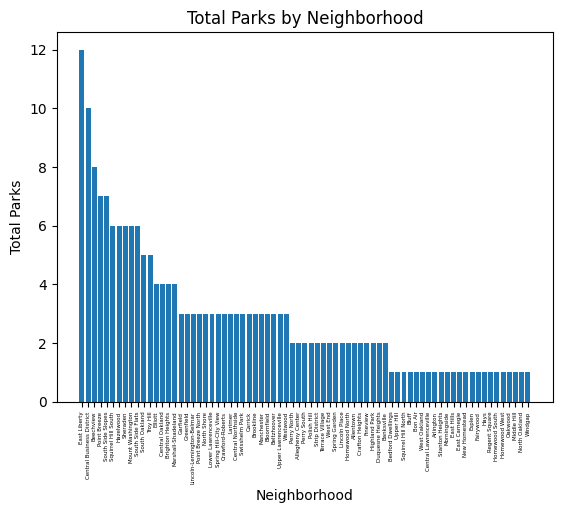

In [114]:
neighborhoods = df_neighborhood['neighborhood']
total_parks = df_neighborhood['total_parks'].values

plt.bar(neighborhoods, total_parks)
plt.title('Total Parks by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Parks')
plt.xticks(rotation=90, fontsize = 4)
plt.show()

/var/folders/1d/zxwk5v9x5858vr4n3twcqg_00000gn/T/ipykernel_76182/163114600.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(neighborhoods[:10], df_neighborhood['normalized'][:10])


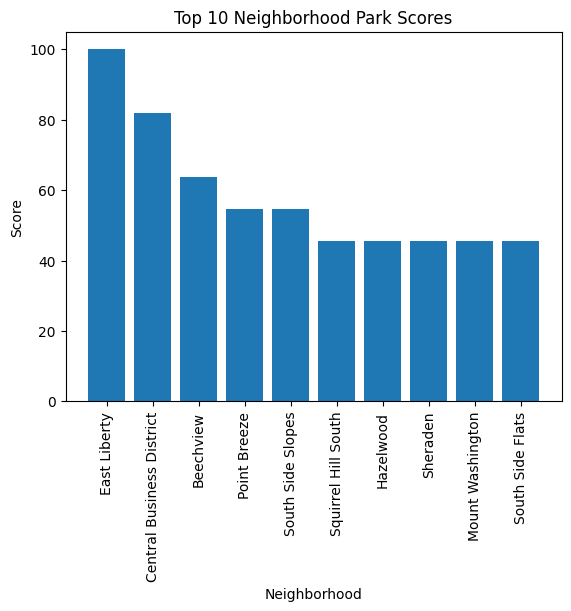

In [ ]:
df_population = pd.read_csv('Data/neighborhood_population.csv')

df_neighborhood['normalized'] = (df_neighborhood['total_parks'] - df_neighborhood['total_parks'].min()) / (df_neighborhood['total_parks'].max() - df_neighborhood['total_parks'].min())
df_neighborhood['normalized'] = df_neighborhood['normalized'] * 100
df_neighborhood.sort_values('normalized', ascending=False, inplace=True)
df_neighborhood.head()

plt.bar(neighborhoods[:10], df_neighborhood['normalized'][:10])
plt.title('Top 10 Neighborhood Park Scores')
plt.xlabel('Neighborhood')
plt.ylabel('Score')
plt.xticks(rotation=90, fontsize = 10)
plt.show()

In [116]:
df_neighborhood.reset_index()[["neighborhood","normalized"]]

,neighborhood,normalized
0,East Liberty,100.000000
1,Central Business District,81.818182
2,Beechview,63.636364
3,Point Breeze,54.545455
4,South Side Slopes,54.545455
...,...,...
68,Bluff,0.000000
69,Squirrel Hill North,0.000000
70,Upper Hill,0.000000
71,Bedford Dwellings,0.000000
